In [14]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import copy

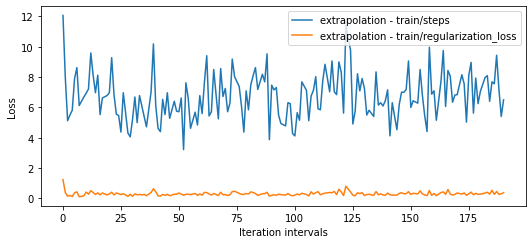

In [62]:
# Set the axis 
xlabel = 'Iteration intervals'
ylabel = 'Loss'

# The name of the variable in the df that you want on the x-axis
xvariable='Step'

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

filedir = 'PonderNet_results_csv'
for filename in os.listdir(filedir):
    with open(os.path.join(filedir, filename), 'r') as f:
        reader = csv.DictReader(f)
        headers = reader.fieldnames
        
        # Read the dataframe using only the specified column names
        df = pd.read_csv(f, names=headers)
        
        # Filter out all min and max data
        full_headers = copy.deepcopy(headers)
        
        # Removes duplicate data which simply plots the same line thrice
        for head in full_headers:
            if 'MIN' in head:
                headers.remove(head)
            if 'MAX' in head:
                headers.remove(head)

        for head in full_headers:
            if head in headers:
                # Convert column to floats
                df[head] = pd.to_numeric(df[head],errors='coerce')
            else:
                # Drop if column not wanted
                df = df.drop([head], axis=1)
                
                
        x = df[xvariable].tolist()
        y = []
        for data in df.columns:
            if data != xvariable:
                y = df[data].tolist()
                plt.plot(x,y,label=data)
                
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.show()